In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.patches as mpatches

In [42]:
df = pd.read_csv('data/shootings.csv')

In [43]:
# Are police shootings increasing year to year?
# Seperating df by year
df2015 = df[df['date'] < '2016-01-01'].sort_values('date')
df2016 = df[(df['date'] > '2015-12-31') & (df['date'] < '2017-01-01')].sort_values('date')
df2017 = df[(df['date'] > '2016-12-31') & (df['date'] < '2018-01-01')].sort_values('date')
df2018 = df[(df['date'] > '2017-12-31') & (df['date'] < '2019-01-01')].sort_values('date')
df2019 = df[(df['date'] > '2018-12-31') & (df['date'] < '2020-01-01')].sort_values('date')
df2020 = df[df['date'] > '2019-12-31'].sort_values('date')

In [44]:
# Number of shootings per year
shot2015 = df2015['name'].count()
shot2016 = df2016['name'].count()
shot2017 = df2017['name'].count()
shot2018 = df2018['name'].count()
shot2019 = df2019['name'].count()
shot2020 = df2020['name'].count()
total_per_year = [shot2015, shot2016, shot2017, shot2018, shot2019]

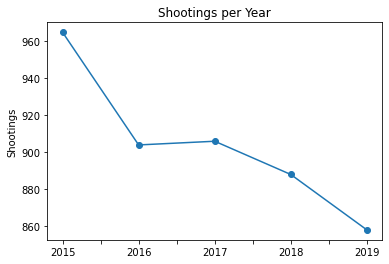

In [45]:
# Number of shootings per year graph
fig, ax = plt.subplots()
lines = ax.plot(range(2015, 2020), total_per_year, marker='o')
ax.set_ylabel('Shootings')
ax.set_title('Shootings per Year')
ax.set_xticklabels(['', '2015', '', '2016', '', '2017', '', '2018', '',  '2019'])
# plt.savefig('shootings_per_year.png')

In [46]:
# Shootings according to race
white = df[df['race'] == 'White'].count()
black = df[df['race'] == 'Black'].count()
hispanic = df[df['race'] == 'Hispanic'].count()
asian = df[df['race'] == 'Asian'].count()
native = df[df['race'] == 'Native'].count()
other = df[df['race'] == 'Other'].count()
races = [white['id'], black['id'], hispanic['id'], asian['id'], native['id'], other['id']]

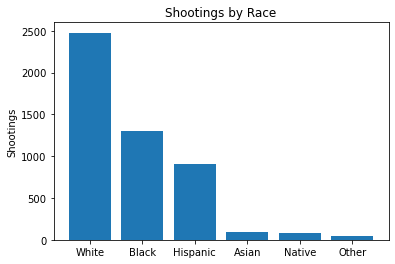

In [47]:
# Shootings according to race graph
race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']
fig, ax = plt.subplots()
ax.bar(range(len(races)), races)
ax.set_ylabel('Shootings')
ax.set_title('Shootings by Race')
ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])
# plt.savefig('shootings_by_race.png')

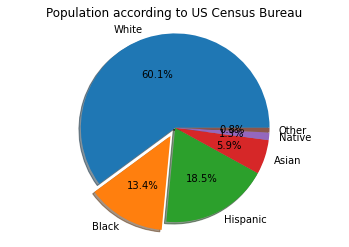

In [48]:
# Pie chart of Races according to US Census Bureau
sizes2 = [60.1, 13.4, 18.5, 5.9, 1.3, .8]
explode = (0, 0.1, 0, 0, 0, 0)

fig1, ax = plt.subplots()
ax.pie(sizes2, explode=explode, labels=race_labels, autopct='%1.1f%%', pctdistance=.6, shadow=True)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Population according to US Census Bureau')
# plt.savefig('population_pie.png')

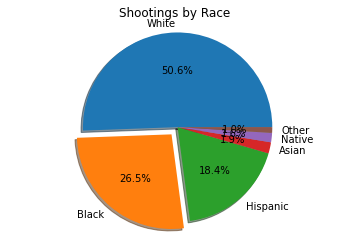

In [49]:
#Pie chart of shootings by race
sizes = [white['id']/sum(races), black['id']/sum(races), hispanic['id']/sum(races), asian['id']/sum(races), native['id']/sum(races), other['id']/sum(races)]
explode = (0, 0.1, 0, 0, 0, 0)

fig1, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=race_labels, autopct='%1.1f%%', pctdistance=.6, shadow=True)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Shootings by Race')
# plt.savefig('race_pie.png')

In [50]:
total_h_shootings_2015 = df2015[df2015['race']=='Hispanic'].count()
total_h_shootings_2016 = df2016[df2016['race']=='Hispanic'].count()
total_h_shootings_2017 = df2017[df2017['race']=='Hispanic'].count()
total_h_shootings_2018 = df2018[df2018['race']=='Hispanic'].count()
total_h_shootings_2019 = df2019[df2019['race']=='Hispanic'].count()
total_h_shootings_2020 = df2020[df2020['race']=='Hispanic'].count()
h_shot_per_year = [total_h_shootings_2015, total_h_shootings_2016, total_h_shootings_2017, total_h_shootings_2018, total_h_shootings_2019]

total_white_shootings_2015 = df2015[df2015['race']=='White'].count()
total_white_shootings_2016 = df2016[df2016['race']=='White'].count()
total_white_shootings_2017 = df2017[df2017['race']=='White'].count()
total_white_shootings_2018 = df2018[df2018['race']=='White'].count()
total_white_shootings_2019 = df2019[df2019['race']=='White'].count()
total_white_shootings_2020 = df2020[df2020['race']=='White'].count()
whites_shot_per_year = [total_white_shootings_2015, total_white_shootings_2016, total_white_shootings_2017, total_white_shootings_2018, total_white_shootings_2019]

total_black_shootings_2015 = df2015[df2015['race']=='Black'].count()
total_black_shootings_2016 = df2016[df2016['race']=='Black'].count()
total_black_shootings_2017 = df2017[df2017['race']=='Black'].count()
total_black_shootings_2018 = df2018[df2018['race']=='Black'].count()
total_black_shootings_2019 = df2019[df2019['race']=='Black'].count()
total_black_shootings_2020 = df2020[df2020['race']=='Black'].count()
blacks_shot_per_year = [total_black_shootings_2015, total_black_shootings_2016, total_black_shootings_2017, total_black_shootings_2018, total_black_shootings_2019]

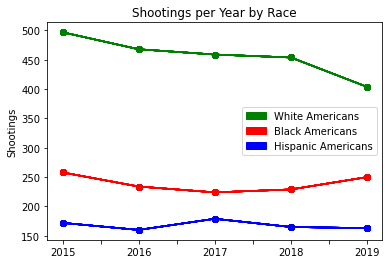

In [108]:
# Plot number of blacks involved in shootings year by year
labels = ['Black Americans', 'White Americans', 'Hispanic Americans']
years = range(5)
fig, ax = plt.subplots()
lines = ax.plot(years, blacks_shot_per_year, marker='o', label='Black Americans', color='r')
hlines = ax.plot(years, h_shot_per_year, marker='o', label='White Americans', color='b')
wlines = ax.plot(years, whites_shot_per_year, marker='o', label='Hispanic Americans', color='g')

ax.set_ylabel('Shootings')
ax.set_title('Shootings per Year by Race')
ax.set_xticklabels(['', '2015', '', '2016', '', '2017', '', '2018', '',  '2019'])
red = mpatches.Patch(color='red', label='Black Americans')
green = mpatches.Patch(color='green', label='White Americans')
blue = mpatches.Patch(color='blue', label='Hispanic Americans')

ax.legend(handles=[green, red, blue], loc = 'best')
# ax.legend()

plt.savefig('shootings_per_year_race.png')

In [52]:
# Shootings by state map
# Shootings by state map involving black race
state_shootings = df['state'].value_counts().reset_index()
blackstate = blackdf['state'].value_counts().reset_index()

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

bins = list(state_shootings['state'].quantile([0, .37, .75, .93, .95, .97, .99, 1]))

m = folium.Map(location=[40, -90], zoom_start=4)

folium.Choropleth(
    bins=bins,
    geo_data=state_geo,
    name='choropleth',
    data=state_shootings,
    columns=['index', 'state'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Police Shootings',
    highlight=True
).add_to(m)

folium.LayerControl().add_to(m)
# m.save('shooting_by_state.png')

m

In [53]:
bins = list(blackstate['state'].quantile([0, .37, .75, .93, .95, .97, .99, 1]))

m = folium.Map(location=[40, -90], zoom_start=4)

folium.Choropleth(
    bins=bins,
    geo_data=state_geo,
    name='choropleth',
    data=blackstate,
    columns=['index', 'state'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Police Shootings Involving Black Americans',
    highlight=True
).add_to(m)

folium.LayerControl().add_to(m)
# m.save('shooting_map_black.html')

m

In [54]:
# df broke up by race
blackdf = df[df['race']=='Black']
whitedf = df[df['race']=='White']
hispanicdf = df[df['race']=='Hispanic']
otherdf = df[(df['race']=='Asian') | (df['race']=='Native') | (df['race']=='Other')]

# df with number of shootings by race
state_shootings = df['state'].value_counts().reset_index()
blackstate = blackdf['state'].value_counts().reset_index()
whitestate = whitedf['state'].value_counts().reset_index()
hispanicstate = hispanicdf['state'].value_counts().reset_index()
otherstate = otherdf['state'].value_counts().reset_index()

In [55]:
# merging shootings by race df and finding ratio of shootings to the total number of shootings in that state
def merge_race_state_df(df):
    compare_state = state_shootings.merge(df, on='index')
    compare_state['ratio'] = compare_state['state_y']/compare_state['state_x']
    compare_state.rename(columns={'state_x':'total', 'state_y':'shootings', 'index':'state'}, inplace=True)
    compare_state.sort_values(by='ratio', ascending=False, inplace=True)
    compare_state.reset_index(drop=True, inplace=True)
    return compare_state

compare_black_state = merge_race_state_df(blackstate)
compare_white_state = merge_race_state_df(whitestate)
compare_hispanic_state = merge_race_state_df(hispanicstate)
compare_other_state = merge_race_state_df(otherstate)
compare_black_state.head()

,state,total,shootings,ratio
0,DC,13,12,0.923077
1,MD,77,47,0.610390
2,LA,102,60,0.588235
3,IL,99,58,0.585859
4,NY,90,46,0.511111


In [56]:
bins = list(compare_black_state['ratio'].quantile([0, .125, .25, .375, .5, .625, .75, .875, 1]))

m = folium.Map(location=[40, -90], zoom_start=4)

folium.Choropleth(
    bins=bins,
    geo_data=state_geo,
    name='choropleth',
    data=compare_black_state,
    columns=['state', 'ratio'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Ratio of Shootings Involving Black Americans',
    highlight=True
).add_to(m)

folium.LayerControl().add_to(m)
# m.save('shooting_map_black_ratio.html')

m

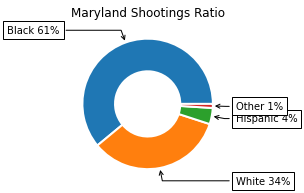

In [57]:
# Donut plot of MD, LA, IL

race_labels_donut = ['Black', 'White', 'Hispanic', 'Other']
size = [.61, .34, .04, .01]

# my_circle = plt.Circle( (0,0), 0.6, color='white')
# plt.pie(size, labels=race_labels, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=['red','green','blue','k'])
# p=plt.gcf()
# p.gca().add_artist(my_circle)

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

race_labels_donut1 = ['Black 61%', 'White 34%', 'Hispanic 4%', 'Other 1%']
size = [.61, .34, .04, .01]

wedges, texts = ax.pie(size, wedgeprops={'width':.5, 'edgecolor':'white', 'linewidth':2 })

bbox_props = dict(boxstyle="square,pad=0.4", fc="w", ec="k")
kw = dict(arrowprops=dict(arrowstyle="->"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(race_labels_donut1[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Maryland Shootings Ratio")
# plt.savefig('md_ratio_donut.png')

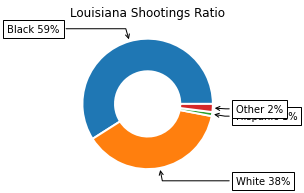

In [58]:

race_labels_donut = ['Black', 'White', 'Hispanic', 'Other']
size = [.61, .34, .04, .01]

# my_circle = plt.Circle( (0,0), 0.6, color='white')
# plt.pie(size, labels=race_labels, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=['red','green','blue','k'])
# p=plt.gcf()
# p.gca().add_artist(my_circle)

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

race_labels_donut2 = ['Black 59%', 'White 38%', 'Hispanic 1%', 'Other 2%']
size = [.59, .38, .01, .02]

wedges, texts = ax.pie(size, wedgeprops={'width':.5, 'edgecolor':'white', 'linewidth':2})

bbox_props = dict(boxstyle="square,pad=0.4", fc="w", ec="k")
kw = dict(arrowprops=dict(arrowstyle="->"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(race_labels_donut2[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Louisiana Shootings Ratio")
# plt.savefig('la_ratio_donut.png')

In [59]:
# ratio of unarmed deaths by race vs national average
# print(la_black[(la_black['armed']=='unarmed')].count()/la_black.count())
# print(la_white[(la_white['armed']=='unarmed')].count()/la_white.count())
# print(df[(df['armed']=='unarmed')].count()/df.count())
print(la_black[(la_black['threat_level']=='attack')].count()/la_black.count())
print(la_white[(la_white['threat_level']=='attack')].count()/la_white.count())
# print(df[(df['threat_level']=='attack')].count()/df.count())


print(la_black[(la_black['armed']=='unarmed')].count()/la_black.count())
print(la_white[(la_white['armed']=='unarmed')].count()/la_white.count())
# print(df[(df['armed']=='unarmed')].count()/df.count())


print(la_black[(la_black['threat_level']!='attack') & (la_black['armed']=='unarmed')].count()/la_black.count())
print(la_white[(la_white['threat_level']!='attack') & (la_white['armed']=='unarmed')].count()/la_white.count())
# print(df[(df['threat_level']!='attack') & (df['armed']=='unarmed')].count()/df.count())

id                         0.733333
name                       0.733333
date                       0.733333
manner_of_death            0.733333
armed                      0.733333
age                        0.733333
gender                     0.733333
race                       0.733333
city                       0.733333
state                      0.733333
signs_of_mental_illness    0.733333
threat_level               0.733333
flee                       0.733333
body_camera                0.733333
arms_category              0.733333
dtype: float64
id                         0.615385
name                       0.615385
date                       0.615385
manner_of_death            0.615385
armed                      0.615385
age                        0.615385
gender                     0.615385
race                       0.615385
city                       0.615385
state                      0.615385
signs_of_mental_illness    0.615385
threat_level               0.615385
flee         

In [60]:
la[la['threat_level']=='attack']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
14,27,Omarr Julian Maximillian Jackson,2015-01-07,shot,gun,37.0,M,Black,New Orleans,LA,False,attack,Foot,True,Guns
36,64,Nathan Massey,2015-01-15,shot,gun,33.0,M,White,Evangeline Parish,LA,False,attack,Not fleeing,False,Guns
130,172,Robert Kohl,2015-02-23,shot,gun,47.0,M,White,Denham Springs,LA,True,attack,Not fleeing,False,Guns
175,278,Jamie Croom,2015-03-10,shot,gun,31.0,M,Black,Baton Rouge,LA,False,attack,Not fleeing,False,Guns
210,308,Richard White,2015-03-20,shot,machete,63.0,M,Black,New Orleans,LA,True,attack,Not fleeing,False,Sharp objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,5067,Kevin Dudenhefer,2019-09-25,shot and Tasered,gun,32.0,M,White,Lacombe,LA,True,attack,Not fleeing,False,Guns
4738,5706,Nathan R. Hodge,2020-04-02,shot,gun,66.0,M,Black,Ouachita Parish,LA,False,attack,Not fleeing,False,Guns
4752,5730,Derek T. Swanson,2020-04-07,shot,gun,28.0,M,White,Caddo Parish,LA,False,attack,Other,False,Guns
4840,5895,Bernard Ledlow,2020-05-17,shot,gun,39.0,M,White,East Baton Rouge,LA,False,attack,Other,False,Guns


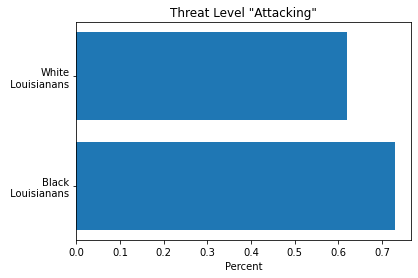

In [105]:
# la_race_labels = ('Black', 'White', 'US AVG')
# fig, ax = plt.subplots()
# ax.barh(range(3), [.73, .62, .65])
# ax.set_ylabel('Demographic')
# ax.set_xlabel('Percentage')
# ax.set_title('LA Percentage of Attacking')
# ax.set_yticklabels(['Black', 'White', 'US AVG'])

la_attacking_percentage = [.73, .62]
la_race_labels = ('Black\n Louisianans', 'White\n Louisianans')
y_pos = np.arange(len(la_race_labels))
 
# Create horizontal bars
plt.barh(y_pos, la_attacking_percentage)
 
# Create names on the y-axis
fig.tight_layout()
plt.yticks(y_pos, la_race_labels)
plt.title('Threat Level "Attacking"')
plt.xlabel('Percent')
plt.savefig('la_attacking_bar.png', bbox_inches = "tight")

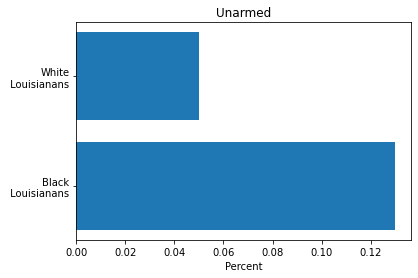

In [104]:
la_unarmed_percentage = [.13, .05]
la_race_labels = ('Black\n Louisianans', 'White\n Louisianans')
y_pos = np.arange(len(la_race_labels))
 
# Create horizontal bars
plt.barh(y_pos, la_unarmed_percentage)
 
# Create names on the y-axis
fig.tight_layout()
plt.yticks(y_pos, la_race_labels)
plt.title('Unarmed')
plt.xlabel('Percent')
plt.savefig('la_unarmed_bar.png', bbox_inches = "tight")

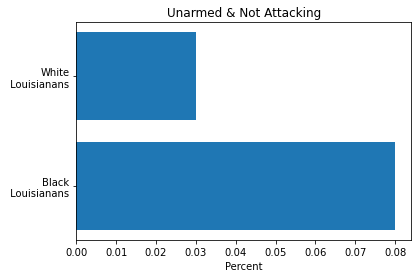

In [103]:
la_unarmed_not_attacking_percentage = [.08, .03]
la_race_labels = ('Black\n Louisianans', 'White\n Louisianans')
y_pos = np.arange(len(la_race_labels))
 
# Create horizontal bars
plt.barh(y_pos, la_unarmed_not_attacking_percentage)
 
# Create names on the y-axis
plt.yticks(y_pos, la_race_labels)
plt.title('Unarmed & Not Attacking')
plt.xlabel('Percent')
fig.tight_layout()

plt.savefig('la_unarmed&not_attacking_bar.png', bbox_inches = "tight")

In [64]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [65]:
# comparing unarmed shootings in LA black vs not black vs country

la_black = blackdf[blackdf['state']=='LA']
la_white = whitedf[whitedf['state']=='LA']
la = df[df['state']=='LA']

print(la_black[(la_black['armed']=='unarmed') & (la_black['threat_level']!='attack')].count()/la_black.count())
print(la[(la['armed']=='unarmed') & (la['threat_level']!='attack')].count()/la.count())
print(df[(df['armed']=='unarmed') & (df['threat_level']!='attack')].count()/df.count())

id                         0.083333
name                       0.083333
date                       0.083333
manner_of_death            0.083333
armed                      0.083333
age                        0.083333
gender                     0.083333
race                       0.083333
city                       0.083333
state                      0.083333
signs_of_mental_illness    0.083333
threat_level               0.083333
flee                       0.083333
body_camera                0.083333
arms_category              0.083333
dtype: float64
id                         0.058824
name                       0.058824
date                       0.058824
manner_of_death            0.058824
armed                      0.058824
age                        0.058824
gender                     0.058824
race                       0.058824
city                       0.058824
state                      0.058824
signs_of_mental_illness    0.058824
threat_level               0.058824
flee         

In [66]:
la

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
14,27,Omarr Julian Maximillian Jackson,2015-01-07,shot,gun,37.0,M,Black,New Orleans,LA,False,attack,Foot,True,Guns
36,64,Nathan Massey,2015-01-15,shot,gun,33.0,M,White,Evangeline Parish,LA,False,attack,Not fleeing,False,Guns
130,172,Robert Kohl,2015-02-23,shot,gun,47.0,M,White,Denham Springs,LA,True,attack,Not fleeing,False,Guns
175,278,Jamie Croom,2015-03-10,shot,gun,31.0,M,Black,Baton Rouge,LA,False,attack,Not fleeing,False,Guns
210,308,Richard White,2015-03-20,shot,machete,63.0,M,Black,New Orleans,LA,True,attack,Not fleeing,False,Sharp objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4709,5651,Harold Spencer,2020-03-18,shot,gun,61.0,M,Black,Iota,LA,False,other,Other,False,Guns
4738,5706,Nathan R. Hodge,2020-04-02,shot,gun,66.0,M,Black,Ouachita Parish,LA,False,attack,Not fleeing,False,Guns
4752,5730,Derek T. Swanson,2020-04-07,shot,gun,28.0,M,White,Caddo Parish,LA,False,attack,Other,False,Guns
4840,5895,Bernard Ledlow,2020-05-17,shot,gun,39.0,M,White,East Baton Rouge,LA,False,attack,Other,False,Guns


In [67]:
la_black[la_black['threat_level']=='other']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
689,837,Bobby R. Anderson,2015-09-15,shot,gun,27.000000,M,Black,Alexandria,LA,False,other,Not fleeing,False,Guns
940,1110,Michael Noel,2015-12-21,shot,unarmed,37.117931,M,Black,Breaux Bridge,LA,True,other,Not fleeing,False,Unarmed
1065,1252,Eric Harris,2016-02-08,shot,unknown,22.000000,M,Black,New Orleans,LA,False,other,Car,False,Unknown
1933,2253,Armond Brown,2017-01-23,shot and Tasered,knife,25.000000,M,Black,Kenner,LA,True,other,Not fleeing,False,Sharp objects
2301,2664,Jordan Frazier,2017-06-13,shot,gun,35.000000,M,Black,Baton Rouge,LA,False,other,Not fleeing,False,Guns
2366,2745,Dejuan Guillory,2017-07-06,shot,unarmed,27.000000,M,Black,Mamou,LA,False,other,Not fleeing,False,Unarmed
3690,4366,Juston Landry,2019-01-11,shot,gun,26.000000,M,Black,Lake Charles,LA,False,other,Other,False,Guns
4140,4880,Leo Brooks,2019-07-18,shot,gun,23.000000,M,Black,Metairie,LA,False,other,Not fleeing,False,Guns
4444,5262,Antonio Nichols,2019-12-09,shot,gun,47.000000,M,Black,St. Helena Parish,LA,False,other,Not fleeing,False,Guns
4709,5651,Harold Spencer,2020-03-18,shot,gun,61.000000,M,Black,Iota,LA,False,other,Other,False,Guns


In [68]:
# Most shooting states
ca = df[df['state']=='CA']
tx = df[df['state']=='TX']
fl = df[df['state']=='FL']
az = df[df['state']=='AZ']
co = df[df['state']=='CO']

In [69]:
def shootings_by_race(dataframe):
    dataframe_white = dataframe[dataframe['race'] == 'White'].count()
    dataframe_black = dataframe[dataframe['race'] == 'Black'].count()
    dataframe_hispanic = dataframe[dataframe['race'] == 'Hispanic'].count()
    dataframe_asian = dataframe[dataframe['race'] == 'Asian'].count()
    dataframe_native = dataframe[dataframe['race'] == 'Native'].count()
    dataframe_other = dataframe[dataframe['race'] == 'Other'].count()
    dataframe_races = [dataframe_white['id'], dataframe_black['id'], dataframe_hispanic['id'], dataframe_asian['id'], dataframe_native['id'], dataframe_other['id']]
    return dataframe_races

<BarContainer object of 6 artists>

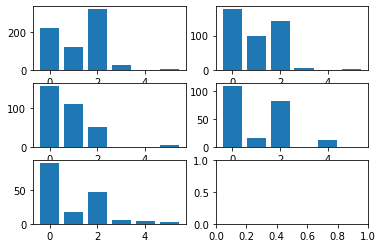

In [70]:
ca_races = shootings_by_race(ca)

race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']
fig, ax = plt.subplots(3, 2)
ax[0,0].bar(range(len(races)), ca_races)
# ax.set_ylabel('Shootings')
# ax.set_title('Shootings by Race in California')
# ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

ax[0,1].bar(range(len(races)), tx_races)
# ax.set_ylabel('Shootings')
# ax.set_title('Shootings by Race in Texas')
# ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

ax[1,0].bar(range(len(races)), fl_races)
ax[1,1].bar(range(len(races)), az_races)
ax[2,0].bar(range(len(races)), co_races)

In [71]:
tx_races = shootings_by_race(tx)

# race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']
# fig, ax = plt.subplots()
# ax.bar(range(len(races)), tx_races)
# ax.set_ylabel('Shootings')
# ax.set_title('Shootings by Race in Texas')
# ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

In [72]:
fl_races = shootings_by_race(fl)

# race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']
# fig, ax = plt.subplots()
# ax.bar(range(len(races)), fl_races)
# ax.set_ylabel('Shootings')
# ax.set_title('Shootings by Race in Florida')
# ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

In [73]:
az_races = shootings_by_race(az)

# race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']
# fig, ax = plt.subplots()
# ax.bar(range(len(races)), az_races)
# ax.set_ylabel('Shootings')
# ax.set_title('Shootings by Race in Arizona')
# ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

In [74]:
co_races = shootings_by_race(co)

# race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other']
# fig, ax = plt.subplots()
# ax.bar(range(len(races)), co_races)
# ax.set_ylabel('Shootings')
# ax.set_title('Shootings by Race in Arizona')
# ax.set_xticklabels(['', 'White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'])

In [75]:
la[la['gender']=='F']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
3083,3605,Betty Lemoine,2018-04-11,shot,gun,71.0,F,White,Winn Parish,LA,False,attack,Not fleeing,False,Guns
4330,5123,Shannon Gail Rupert,2019-10-25,shot,scissors,45.0,F,White,Bossier City,LA,False,other,Not fleeing,False,Sharp objects


Ttest_indResult(statistic=-0.5637589023450906, pvalue=0.572944060779168)


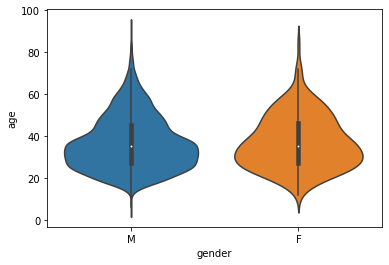

In [76]:
# T-test
male = df.query('gender == "M"')['age']
female = df.query('gender == "F"')['age']

res = stats.ttest_ind(male, female)

print(res)

sns.violinplot(x='gender', y='age', data=df)

Ttest_indResult(statistic=17.003944825434328, pvalue=1.5532242611583847e-62)

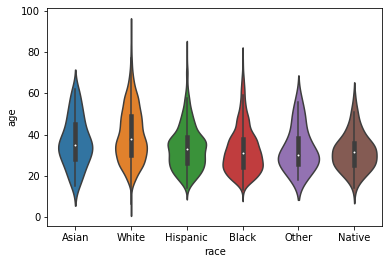

In [77]:
# T-test
white = df.query('race == "White"')['age']
black = df.query('race == "Black"')['age']

res = stats.ttest_ind(white, black, 
                      equal_var=True)

display(res)

sns.violinplot(x='race', y='age', data=df)

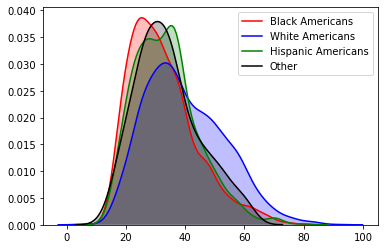

In [78]:
p1=sns.kdeplot(blackdf['age'], shade=True, color="r", label='Black Americans')
p1=sns.kdeplot(whitedf['age'], shade=True, color="b", label='White Americans')
p1=sns.kdeplot(hispanicdf['age'], shade=True, color="g", label='Hispanic Americans')
p1=sns.kdeplot(otherdf['age'], shade=True, color="k", label='Other')

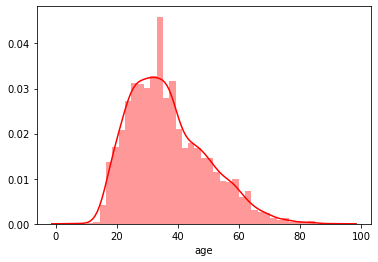

In [79]:
sns.distplot(df['age'],kde=True,color='r')

In [113]:
la[la['armed']=='unarmed']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
811,980,Jeremy Mardis,2015-11-03,shot,unarmed,6.000000,M,White,Marksville,LA,False,other,Car,True,Unarmed
940,1110,Michael Noel,2015-12-21,shot,unarmed,37.117931,M,Black,Breaux Bridge,LA,True,other,Not fleeing,False,Unarmed
2244,2596,Ricco Devante Holden,2017-05-21,shot,unarmed,24.000000,M,Black,Converse,LA,False,attack,Not fleeing,False,Unarmed
2366,2745,Dejuan Guillory,2017-07-06,shot,unarmed,27.000000,M,Black,Mamou,LA,False,other,Not fleeing,False,Unarmed
2699,3135,Calvin Toney,2017-11-13,shot,unarmed,24.000000,M,Black,Baton Rouge,LA,False,attack,Foot,True,Unarmed
2990,3511,Shermichael Ezeff,2018-03-14,shot,unarmed,31.000000,M,Black,East Baton Rouge,LA,True,attack,Not fleeing,False,Unarmed
3127,3650,Brandon Busher,2018-04-29,shot,unarmed,38.000000,M,White,Shreveport,LA,False,attack,Foot,False,Unarmed
4151,4894,Josef Delon Richardson,2019-07-25,shot,unarmed,38.000000,M,Black,Port Allen,LA,False,undetermined,Other,False,Unarmed
4242,5042,Melvin Watkins,2019-09-14,shot,unarmed,54.000000,M,Black,Baton Rouge,LA,False,undetermined,Not fleeing,False,Unarmed
4301,5099,Christopher Whitfield,2019-10-14,shot,unarmed,31.000000,M,Black,Ethel,LA,True,undetermined,Foot,False,Unarmed
